# Harnessing the Power of Kolmogorov Arnould Network (KAN)



## Kolgomorov-Arnold Representation Theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

# Example KAN work to showcase the model learning weights

In [ ]:
!pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-1gd3grj7
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-1gd3grj7
  Resolved https://github.com/KindXiaoming/pykan.git to commit 00a9077100b9783304b1df95de47b7344e3e1eec
  Preparing metadata (setup.py) ... done


In [ ]:
# Import the kan library and PyTorch
from kan import *
import torch

# Set the default data type for tensors to 64-bit floating point
torch.set_default_dtype(torch.float64)

# Check for GPU availability and set the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)  # Print the device being used (e.g., 'cuda' or 'cpu')

# Create a KAN model
# - Input dimensions: 2D
# - Output dimensions: 1D
# - Hidden layer: 5 neurons
# - Cubic spline (k=3)
# - Grid intervals: 3
# - Random seed: 42 (ensures reproducibility)
# - Device: Set to GPU if available, otherwise CPU
model = KAN(width=[2, 5, 1], grid=3, k=3, seed=42, device=device)


cuda
checkpoint directory created: ./model
saving model version 0.0


In [ ]:
# Import the dataset creation utility from the kan library
from kan.utils import create_dataset

# Define the function f(x, y) = exp(sin(pi*x) + y^2)
# - 'x[:, [0]]': Selects the first variable (x) from the input tensor
# - 'x[:, [1]]': Selects the second variable (y) from the input tensor
# - 'torch.exp': Computes the exponential of the sum
f = lambda x: torch.exp(torch.sin(torch.pi * x[:, [0]]) + x[:, [1]]**2)

# Create a dataset for the function
# - n_var=2: Indicates two input variables (x, y)
# - device=device: Ensures the dataset tensors are created on the selected computation device (GPU or CPU)
dataset = create_dataset(f, n_var=2, device=device)

# Print the shapes of the training input and labels
# - 'train_input': Features for training
# - 'train_label': Corresponding output labels
dataset['train_input'].shape, dataset['train_label'].shape


(torch.Size([1000, 2]), torch.Size([1000, 1]))

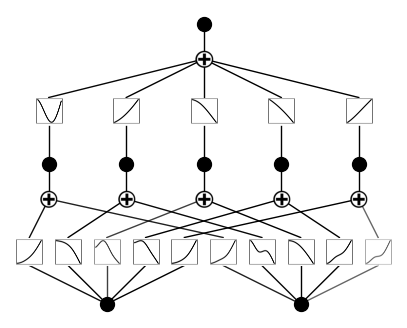

In [ ]:
# Apply the KAN model to the training input data
model(dataset['train_input'])

# Plot the KAN model's initialization state
model.plot()


In [ ]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 2.02e-02 | test_loss: 2.03e-02 | reg: 5.75e+00 | : 100%|█| 50/50 [00:26<00:00,  1.85it

saving model version 0.1


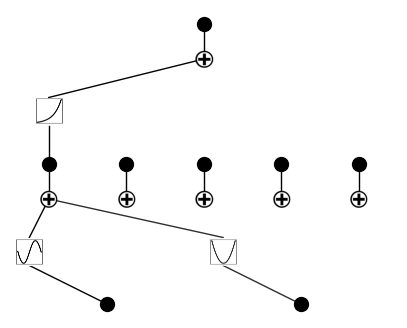

In [ ]:
model.plot()

saving model version 0.2


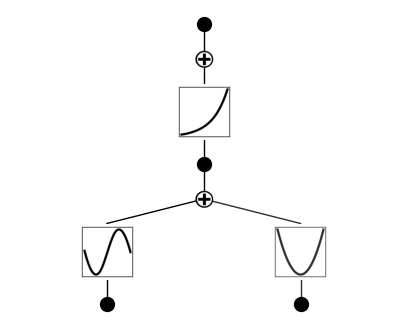

In [ ]:
model = model.prune()
model.plot()

As we can see here that the model is able to sort of categorize the inputs as different continuous functions. And it fires up ony those funcions which are a "well represented" form of our input.

(This exerpt is taken from [here](https://github.com/KindXiaoming/pykan/tree/master))

# KAN for Image Classification

We will now test KAN model on few of the tasks:

1. Classification

  * for Fasion MNIST dataset (which contains large number of data instanes and are more image based classification)
  * for Iris dataset (which has rather less number of data instances and are information bsed cassification.

2. Regression

  * for Diabetes dataset

## Installing and Importing important libraries.

To try the network in Tensorflow, we will first install the tfkan library and later import it with other essential libraries.

In [ ]:
!pip install tfkan

## TensorFlow and Keras Code with Custom Layers (DenseKAN and Conv2DKAN)
This code snippet demonstrates how to import essential components for building a convolutional neural network using TensorFlow and Keras, along with custom layers (DenseKAN, Conv2DKAN) that might belong to an external library, `tfkan`.

- **TensorFlow and Keras** are being used to build and train deep learning models.
- **Numpy** is imported to handle array and matrix operations.
- **Matplotlib** is imported for visualizing data, typically for plotting training/validation losses or images.
- The custom `tfkan.layers` imports imply some custom layer types that expand on the basic Keras layers.

In [ ]:
# Import TensorFlow for deep learning capabilities
import tensorflow as tf

# Import layers from Keras for building neural networks
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D

# Import custom layers from a hypothetical library 'tfkan'
# These layers are extensions of standard Dense and Conv2D,
# possibly with additional functionalities
from tfkan.layers import DenseKAN, Conv2DKAN

# Import NumPy for numerical operations, especially for handling arrays
import numpy as np

# Import Matplotlib for plotting and visualizing results
from matplotlib import pyplot as plt

# Loading and Preprocessing the Fashion-MNIST Dataset

In this code snippet, the Fashion-MNIST dataset is loaded and preprocessed for use in a convolutional neural network (CNN). The dataset consists of 70,000 grayscale images (28x28 pixels) across 10 different categories of clothing items. The training set contains 60,000 examples, while the test set includes 10,000 examples.

### Steps:
1. **Load the Fashion-MNIST dataset**: This is done using TensorFlow's built-in dataset loading function.
2. **Normalize the data**: The pixel values, originally between 0 and 255, are scaled to values between 0 and 1 by dividing by 255.0. This helps to speed up the training process.
3. **Expand dimensions**: Since CNN layers expect input data to have a certain shape, we add an extra dimension to indicate that the images are grayscale (1 channel).

In [ ]:
# Load the Fashion-MNIST dataset from TensorFlow datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the image data to a range between 0 and 1 by dividing by 255
# Expand dimensions to add an extra channel for grayscale (axis=-1)
# Convert the data type to float32 for compatibility with most models
x_train = np.expand_dims(x_train / 255.0, axis=-1).astype(np.float32)
x_test = np.expand_dims(x_test / 255.0, axis=-1).astype(np.float32)

In [ ]:
# Print out the shape of the train dataset.
x_train.shape

(60000, 28, 28, 1)

# Building a Simple Convolutional Neural Network (CNN) for Fashion-MNIST Classification

This code snippet demonstrates how to build a simple Convolutional Neural Network (CNN) using the Keras API in TensorFlow to classify images from the Fashion-MNIST dataset. The network consists of two convolutional layers, followed by global average pooling, and finally a dense layer for classification.

### Model Overview:
1. **Conv2D Layers**: Extract features from the input image by applying filters to create feature maps.
2. **GlobalAveragePooling2D**: Reduces the spatial dimensions of each feature map to a single value (global average) before feeding into the final classification layer.
3. **Dense Layer with Softmax**: Classifies the image into one of 10 categories using the softmax activation function.

In [ ]:
# Define a sequential model using Keras
mlp = tf.keras.models.Sequential([

    # First convolutional layer
    # - 32 filters (feature detectors) of size 5x5
    # - Stride of 2 means the filter will move 2 pixels at a time (reduces spatial dimensions faster)
    # - 'valid' padding implies no padding around the input image (so the output size reduces)
    # - ReLU activation function introduces non-linearity
    Conv2D(filters=32, kernel_size=5, strides=2, padding='valid', activation='relu'),

    # Second convolutional layer
    # - 64 filters of size 5x5
    # - Stride of 2, reducing spatial dimensions further
    # - 'valid' padding again reduces size without any added borders
    Conv2D(filters=64, kernel_size=5, strides=2, padding='valid', activation='relu'),

    # Global Average Pooling layer
    # - Reduces each feature map to a single number by averaging all values
    GlobalAveragePooling2D(),

    # Dense layer for classification
    # - 10 output units (for the 10 classes in Fashion-MNIST)
    # - Softmax activation to get class probabilities
    Dense(10, activation='softmax')
])

# Build the model by defining the input shape (28x28x1 for grayscale images)
mlp.build(input_shape=(None, 28, 28, 1))

# Print a summary of the model architecture
mlp.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          51264     
                                                                 
 global_average_pooling2d_6  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 52746 (206.04 KB)
Trainable params: 52746 (206.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from datetime import datetime as dt

start = dt.now()
# Compile the model
# - Optimizer: Adam optimizer with a learning rate of 1e-3 (0.001)
# - Loss: Sparse categorical cross-entropy (used for integer-labeled multi-class classification)
# - Metrics: Accuracy to monitor the model's performance during training
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
# - Epochs: 10 (number of passes through the training data)
# - Batch size: 128 (number of samples processed before updating the model parameters)
# - Validation data: Use the test set to evaluate the model's performance at the end of each epoch
# - Verbose=1: Print progress during training
mlp_history_fm = mlp.fit(x_train, y_train,
                      epochs=10,
                      batch_size=128,
                      validation_data=(x_test, y_test),
                      verbose=1)


running_secs_mlp_fm = (dt.now() - start)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.9442 - accuracy: 0.6617 - val_loss: 0.7067 - val_accuracy: 0.7410
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.6502 - accuracy: 0.7639 - val_loss: 0.6730 - val_accuracy: 0.7483
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5727 - accuracy: 0.7960 - val_loss: 0.5666 - val_accuracy: 0.8008
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5242 - accuracy: 0.8132 - val_loss: 0.5322 - val_accuracy: 0.8161
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4941 - accuracy: 0.8238 - val_loss: 0.5000 - val_accuracy: 0.8259
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4700 - accuracy: 0.8334 - val_loss: 0.4882 - val_accuracy: 0.8267
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4481 - accuracy: 0.8417 - val_loss: 0.4639 - val_accuracy: 0.8374
Epoc

# Building a Kolmogorov-Arnold Network (KAN) for Fashion-MNIST Classification

This code constructs a Kolmogorov-Arnold Network (KAN) model for classifying Fashion-MNIST images. In this context, the KAN architecture uses the Kolmogorov-Arnold representation theorem to approximate multivariate functions, implemented through layers like `Conv2DKAN` and `DenseKAN`, which may focus on decomposing the function into simpler parts.

In [ ]:
# Define a sequential KAN model
kan = tf.keras.models.Sequential([

    # First Conv2DKAN layer:
    # - 8 filters with a kernel size of 5x5
    # - Stride of 2 to reduce spatial resolution by half
    # - 'valid' padding indicates no padding around the input
    # - 'kan_kwargs' specifies the grid size for decomposition (custom KAN behavior)
    Conv2DKAN(filters=8, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),

    # Layer normalization to stabilize the training by normalizing the activations
    tf.keras.layers.LayerNormalization(),

    # Second Conv2DKAN layer:
    # - 16 filters with a kernel size of 5x5
    # - Stride of 2 for further spatial downsampling
    Conv2DKAN(filters=16, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),

    # Global Average Pooling to reduce each feature map to a single value
    GlobalAveragePooling2D(),

    # DenseKAN layer:
    # - Fully connected layer using Kolmogorov-Arnold decomposition (grid size = 3)
    # - Output layer with 10 units, one for each class in the Fashion-MNIST dataset
    DenseKAN(10, grid_size=3),

    # Softmax activation for converting logits into class probabilities
    tf.keras.layers.Softmax()
])

# Build the KAN model specifying the input shape (28x28x1 for grayscale images)
kan.build(input_shape=(None, 28, 28, 1))

# Print a summary of the KAN model architecture
kan.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2dkan_6 (Conv2DKAN)     (None, 12, 12, 8)         1658      
                                                                 
 layer_normalization_3 (Lay  (None, 12, 12, 8)         16        
 erNormalization)                                                
                                                                 
 conv2dkan_7 (Conv2DKAN)     (None, 4, 4, 16)          24416     
                                                                 
 global_average_pooling2d_7  (None, 16)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_kan_17 (DenseKAN)     (None, 10)                1290      
                                                                 
 softmax_6 (Softmax)         (None, 10)              

In [ ]:
start = dt.now()

# Compile the KAN model
# - Optimizer: Adam optimizer with a learning rate of 0.001 (1e-3)
# - Loss: Sparse categorical cross-entropy (since the labels are integer-encoded)
# - Metrics: Track accuracy to evaluate performance during training
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the KAN model
# - Epochs: 10 (the number of complete passes through the training data)
# - Batch size: 128 (the number of samples to process before updating the model)
# - Validation data: Evaluate the model on the test set after each epoch to track its generalization ability
# - Verbose=1: Print progress and results for each epoch
kan_history_fm = kan.fit(x_train, y_train,
                      epochs=10,
                      batch_size=128,
                      validation_data=(x_test, y_test),
                      verbose=1)

start = dt.now()
running_secs_kan_fm = (dt.now() - start)

Epoch 1/10
469/469 [==============================] - 25s 41ms/step - loss: 1.0604 - accuracy: 0.6369 - val_loss: 0.7350 - val_accuracy: 0.7356
Epoch 2/10
469/469 [==============================] - 14s 29ms/step - loss: 0.6469 - accuracy: 0.7673 - val_loss: 0.6264 - val_accuracy: 0.7759
Epoch 3/10
469/469 [==============================] - 14s 29ms/step - loss: 0.5634 - accuracy: 0.7967 - val_loss: 0.5619 - val_accuracy: 0.8014
Epoch 4/10
469/469 [==============================] - 14s 29ms/step - loss: 0.5191 - accuracy: 0.8105 - val_loss: 0.5364 - val_accuracy: 0.8064
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.4919 - accuracy: 0.8217 - val_loss: 0.5146 - val_accuracy: 0.8156
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.4706 - accuracy: 0.8301 - val_loss: 0.5057 - val_accuracy: 0.8179
Epoch 7/10
469/469 [==============================] - 14s 31ms/step - loss: 0.4559 - accuracy: 0.8354 - val_loss: 0.4845 - val_accuracy:

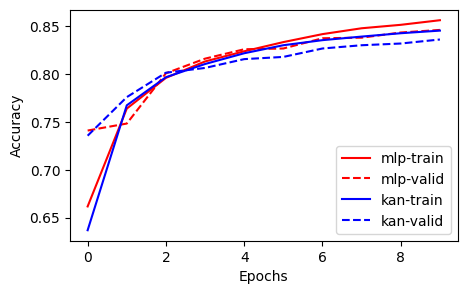

In [ ]:
# Create a figure with a custom size (5x3 inches)
fig = plt.figure(figsize=(5, 3))

# Plot the MLP model's training accuracy
# - 'mlp_history.history['accuracy']' contains the training accuracy at each epoch
# - 'label' sets the label for the line in the legend
# - 'ls' defines the line style: solid line for training data
# - 'color' sets the color of the line to red
plt.plot(mlp_history_fm.history['accuracy'], label='mlp-train', ls="-", color="red")

# Plot the MLP model's validation accuracy
# - 'mlp_history.history['val_accuracy']' contains the validation accuracy
# - Dashed line for validation data
plt.plot(mlp_history_fm.history['val_accuracy'], label='mlp-valid', ls="--", color="red")

# Plot the KAN model's training accuracy
# - Blue color is used to distinguish from MLP
plt.plot(kan_history_fm.history['accuracy'], label='kan-train', ls="-", color="blue")

# Plot the KAN model's validation accuracy
# - Dashed blue line for validation data
plt.plot(kan_history_fm.history['val_accuracy'], label='kan-valid', ls="--", color="blue")

# Set the x-axis label to 'Epochs'
plt.xlabel("Epochs")

# Set the y-axis label to 'Accuracy'
plt.ylabel("Accuracy")

# Display the legend to identify the plotted lines
plt.legend()

# Show the plot
plt.show()

## Phase one Insights

### From the above experiment the following observations can be seen:
1. AS it can be seen from the curve, the KANs model learns parameters very easily and does so with less number of parameters as compared to MLP
2. As the dataset is too high, MLP is performing better because it can adjust to the complexities better than KANs model. However, KANs have a comparable learning curve as well, which can only mean that for smaller models, much like MobileNet, we can substitute the solution with a KAN model which will be less parametric and less memory.

# KAN for Smaller dataset for Classification task

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations and array manipulations
import pandas as pd  # For data manipulation and analysis
from sklearn.datasets import load_iris  # To load the Iris dataset

# Load the Iris dataset
iris = load_iris()

# Create a pandas DataFrame from the Iris dataset
# 1. Use np.c_ to concatenate the data (features) and target (labels) into a single array.
# 2. Assign column names combining feature names and a target column.
# 3. Convert the target column to integers for consistency.
# 4. Add a new column 'species' using assign and map to translate target values into species names.
df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],  # Concatenate data and target
    columns=iris['feature_names'] + ['target']  # Define column names
).astype({'target': int}).assign(
    species=lambda x: x['target'].map(dict(enumerate(iris['target_names'])))  # Map target to species names
)

# Output the first few rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations and array manipulations
import tensorflow as tf  # For building and training the neural network
from sklearn.datasets import load_iris  # To load the Iris dataset
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import Dense  # For adding dense (fully connected) layers
from tensorflow.keras.utils import to_categorical  # For one-hot encoding of labels

# Load the Iris dataset
data = load_iris()

# Extract features and labels
X = data.data  # Feature data: sepal length, sepal width, petal length, petal width
y = data.target  # Labels: Encoded as 0, 1, 2 (for three species)

# Standardize features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()  # Initialize the scaler
X = scaler.fit_transform(X)  # Fit to the data and transform

# One-hot encode the labels to represent them in a binary matrix format
# For example, label '2' becomes [0, 0, 1]
y = to_categorical(y)

# Split the data into training and testing sets
# 80% of data for training and 20% for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split  # Import the train-test split function

# Split the data into training and testing sets
# Arguments:
# - X: The feature data (input variables)
# - y: The target data (output labels)
# - test_size: Proportion of the dataset to include in the test split (20% in this case)
# - random_state: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)


In [ ]:
X_train.shape

(120, 4)

In [ ]:
# Import TensorFlow for building the model
import tensorflow as tf

# Define a Sequential model
model_clf = tf.keras.Sequential([
    # Input layer with 8 neurons and ReLU activation
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    # Hidden layer with 16 neurons and ReLU activation
    tf.keras.layers.Dense(16, activation='relu'),
    # Output layer with 3 neurons (for 3 classes) and softmax activation for classification
    tf.keras.layers.Dense(3, activation='softmax'),
])

# Print the model summary to display the architecture
model_clf.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 40        
                                                                 
 dense_20 (Dense)            (None, 16)                144       
                                                                 
 dense_21 (Dense)            (None, 3)                 51        
                                                                 
Total params: 235 (940.00 Byte)
Trainable params: 235 (940.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Import the required libraries
import tensorflow as tf

start = dt.now()

# Compile the model
# - optimizer: 'adam' is an adaptive optimizer that adjusts learning rates during training.
# - loss: 'categorical_crossentropy' is used for multi-class classification problems.
# - metrics: 'accuracy' evaluates the model's performance during training.
model_clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# - X_train, y_train: Training data and labels.
# - epochs: Number of times the model will go through the entire dataset during training (50 here).
# - batch_size: Number of samples processed before the model updates its weights (5 here).
# - validation_data: Data used for validating model performance after each epoch.
history_mlp_iris = model_clf.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))


running_secs_mlp_i = (dt.now() - start)

Epoch 1/50
24/24 [==============================] - 2s 11ms/step - loss: 1.0948 - accuracy: 0.1917 - val_loss: 1.0061 - val_accuracy: 0.3000
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0237 - accuracy: 0.2250 - val_loss: 0.9588 - val_accuracy: 0.4667
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9691 - accuracy: 0.3917 - val_loss: 0.9069 - val_accuracy: 0.7667
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9123 - accuracy: 0.5917 - val_loss: 0.8278 - val_accuracy: 0.7667
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.8444 - accuracy: 0.6250 - val_loss: 0.7363 - val_accuracy: 0.7667
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7717 - accuracy: 0.6250 - val_loss: 0.6421 - val_accuracy: 0.7667
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.6250 - val_loss: 0.5649 - val_accuracy: 0.7667
Epoch 8/50
24/24 [=

In [ ]:
# Define a sequential KAN model
kan = tf.keras.models.Sequential([
    DenseKAN(2),  # Custom DenseKAN layer with 2 units
    DenseKAN(3),  # Custom DenseKAN layer with 3 units
    tf.keras.layers.Softmax()  # Softmax activation for multi-class classification
])

# Build the KAN model specifying the input shape (e.g., 4 input features)
kan.build(input_shape=(None, 4))

# Print a summary of the KAN model architecture
kan.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_kan_18 (DenseKAN)     (None, 2)                 122       
                                                                 
 dense_kan_19 (DenseKAN)     (None, 3)                 81        
                                                                 
 softmax_7 (Softmax)         (None, 3)                 0         
                                                                 
Total params: 203 (812.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 72 (288.00 Byte)
_________________________________________________________________


In [ ]:
start = dt.now()


# Compile the KAN model
# - Optimizer: Adam optimizer with a learning rate of 0.001
# - Loss: Categorical crossentropy for multi-class classification
# - Metrics: Accuracy to evaluate the model's performance
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the KAN model
# - epochs: 50 epochs (iterations over the entire dataset)
# - batch_size: Process 128 samples before updating weights
# - validation_data: Evaluate the model on test data after each epoch
# - verbose: Print training progress (1 for detailed output)
kan_history_iris = kan.fit(X_train, y_train,
                      epochs=50,
                      batch_size=128,
                      validation_data=(X_test, y_test),
                      verbose=1)


running_secs_kan_i = (dt.now() - start)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.2117 - accuracy: 0.3167 - val_loss: 1.1568 - val_accuracy: 0.3000
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 1.2083 - accuracy: 0.3167 - val_loss: 1.1548 - val_accuracy: 0.3000
Epoch 3/50
1/1 [==============================] - 0s 70ms/step - loss: 1.2050 - accuracy: 0.3250 - val_loss: 1.1528 - val_accuracy: 0.3000
Epoch 4/50
1/1 [==============================] - 0s 52ms/step - loss: 1.2017 - accuracy: 0.3250 - val_loss: 1.1508 - val_accuracy: 0.3000
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 1.1984 - accuracy: 0.3250 - val_loss: 1.1488 - val_accuracy: 0.3000
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 1.1952 - accuracy: 0.3250 - val_loss: 1.1468 - val_accuracy: 0.3000
Epoch 7/50
1/1 [==============================] - 0s 52ms/step - loss: 1.1920 - accuracy: 0.3250 - val_loss: 1.1447 - val_accuracy: 0.3000
Epoch 8/50
1/1 [=============

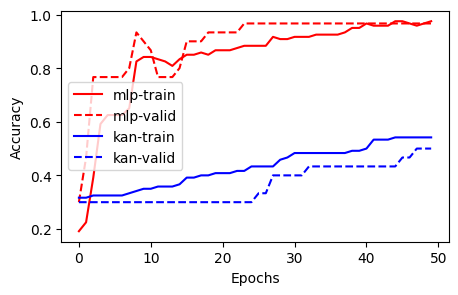

In [ ]:
# Import the required library
import matplotlib.pyplot as plt

# Create a figure with custom size (5x3 inches)
fig = plt.figure(figsize=(5, 3))

# Plot the MLP model's training accuracy
plt.plot(history_mlp_iris.history['accuracy'], label='mlp-train', ls="-", color="red")

# Plot the MLP model's validation accuracy
plt.plot(history_mlp_iris.history['val_accuracy'], label='mlp-valid', ls="--", color="red")

# Plot the KAN model's training accuracy
plt.plot(kan_history_iris.history['accuracy'], label='kan-train', ls="-", color="blue")

# Plot the KAN model's validation accuracy
plt.plot(kan_history_iris.history['val_accuracy'], label='kan-valid', ls="--", color="blue")

# Label the x-axis as 'Epochs'
plt.xlabel("Epochs")

# Label the y-axis as 'Accuracy'
plt.ylabel("Accuracy")

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()


# KAN For Regression

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset using scikit-learn's built-in function
diabetes_sklearn = load_diabetes()

# Convert the dataset into a pandas DataFrame for easier manipulation
# `data` contains the feature variables, and `feature_names` provides column names
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

# Add the target variable (disease progression measure) as a new column to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

# Display the first 5 rows of the DataFrame to inspect the structure and data
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
diabetes_train, diabetes_test, target_train, target_test = train_test_split(diabetes_df.drop('target', axis=1),
                                                                            diabetes_df['target'],
                                                                            test_size=0.2,
                                                                            random_state=42)

diabetes_train.shape, target_train.shape

((353, 10), (353,))

In [ ]:
import tensorflow as tf

# Define a simple MLP model using Keras Sequential API
mlp = tf.keras.models.Sequential([
    # First hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    # Output layer with 1 neuron for regression tasks (no activation function)
    tf.keras.layers.Dense(1)
])

# Specify the input shape of the model as a 10-dimensional vector
mlp.build(input_shape=(None, 10))

# Display the model architecture and the number of trainable parameters
mlp.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                704       
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:


# Start the timer to measure training time
start = dt.now()

# Compile the MLP model
# Optimizer: Adam with a learning rate of 0.002
# Loss: Mean Squared Error (MSE), suitable for regression
# Metrics: Mean Absolute Error (MAE) to monitor performance during training
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
            loss='mse',
            metrics=['mae'])

# Train the MLP model
# Inputs: training features (diabetes_train) and target values (target_train)
# Validation data: evaluates model on diabetes_test and target_test after each epoch
# Epochs: train for 300 iterations
# Batch size: use 64 samples per batch for gradient updates
# Verbose: set to 2 to print detailed logs for each epoch
mlp_history_reg = mlp.fit(diabetes_train,
                          target_train,
                          epochs=300,
                          batch_size=64,
                          validation_data=(diabetes_test, target_test),
                          verbose=2)

# Calculate the total training time in seconds
running_secs_mlp_reg = (dt.now() - start)


Epoch 1/300
6/6 - 1s - loss: 29701.3730 - mae: 153.7081 - val_loss: 26524.4883 - val_mae: 145.6992 - 874ms/epoch - 146ms/step
Epoch 2/300
6/6 - 0s - loss: 29675.0000 - mae: 153.6257 - val_loss: 26499.6992 - val_mae: 145.6176 - 47ms/epoch - 8ms/step
Epoch 3/300
6/6 - 0s - loss: 29647.7344 - mae: 153.5407 - val_loss: 26472.5176 - val_mae: 145.5287 - 58ms/epoch - 10ms/step
Epoch 4/300
6/6 - 0s - loss: 29616.6523 - mae: 153.4449 - val_loss: 26440.9180 - val_mae: 145.4260 - 48ms/epoch - 8ms/step
Epoch 5/300
6/6 - 0s - loss: 29580.3848 - mae: 153.3332 - val_loss: 26404.0781 - val_mae: 145.3063 - 45ms/epoch - 8ms/step
Epoch 6/300
6/6 - 0s - loss: 29538.2754 - mae: 153.2026 - val_loss: 26361.4609 - val_mae: 145.1680 - 59ms/epoch - 10ms/step
Epoch 7/300
6/6 - 0s - loss: 29489.8066 - mae: 153.0520 - val_loss: 26312.6523 - val_mae: 145.0095 - 78ms/epoch - 13ms/step
Epoch 8/300
6/6 - 0s - loss: 29433.6348 - mae: 152.8795 - val_loss: 26257.4473 - val_mae: 144.8299 - 43ms/epoch - 7ms/step
Epoch 9/30

In [ ]:
import tensorflow as tf

# Define a KAN model using custom layers (DenseKAN)
kan = tf.keras.models.Sequential([
    # First custom layer with 4 neurons
    DenseKAN(4),
    # Output custom layer with 1 neuron for regression tasks
    DenseKAN(1)
])

# Specify the input shape for the model as a 10-dimensional vector
kan.build(input_shape=(None, 10))

# Display the model's architecture and the number of trainable parameters
kan.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_kan_20 (DenseKAN)     (None, 4)                 484       
                                                                 
 dense_kan_21 (DenseKAN)     (None, 1)                 85        
                                                                 
Total params: 569 (2.22 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 168 (672.00 Byte)
_________________________________________________________________


In [ ]:
from datetime import datetime as dt

# Start the timer to measure training time
start = dt.now()

# Compile the KAN model
# Optimizer: Adam with a learning rate of 0.002 for efficient training
# Loss: Mean Squared Error (MSE) for regression tasks
# Metrics: Mean Absolute Error (MAE) to track performance during training
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
            loss='mse',
            metrics=['mae'])

# Train the KAN model
# Inputs: training features (diabetes_train) and target values (target_train)
# Validation data: evaluates model on diabetes_test and target_test after each epoch
# Epochs: 300 iterations of training
# Batch size: 64 samples per gradient update
# Verbose: set to 2 for detailed logs during training
kan_history_reg = kan.fit(diabetes_train,
                          target_train,
                          epochs=300,
                          batch_size=64,
                          validation_data=(diabetes_test, target_test),
                          verbose=2)

# Calculate the total training time in seconds
running_secs_kan_reg = (dt.now() - start)


Epoch 1/300
6/6 - 3s - loss: 29711.1445 - mae: 153.7345 - val_loss: 26530.3965 - val_mae: 145.7125 - 3s/epoch - 553ms/step
Epoch 2/300
6/6 - 0s - loss: 29681.8184 - mae: 153.6391 - val_loss: 26503.1602 - val_mae: 145.6188 - 102ms/epoch - 17ms/step
Epoch 3/300
6/6 - 0s - loss: 29653.3008 - mae: 153.5460 - val_loss: 26476.1074 - val_mae: 145.5255 - 85ms/epoch - 14ms/step
Epoch 4/300
6/6 - 0s - loss: 29624.3730 - mae: 153.4521 - val_loss: 26448.1074 - val_mae: 145.4290 - 58ms/epoch - 10ms/step
Epoch 5/300
6/6 - 0s - loss: 29594.2637 - mae: 153.3529 - val_loss: 26417.6289 - val_mae: 145.3239 - 71ms/epoch - 12ms/step
Epoch 6/300
6/6 - 0s - loss: 29560.7539 - mae: 153.2436 - val_loss: 26383.1777 - val_mae: 145.2052 - 58ms/epoch - 10ms/step
Epoch 7/300
6/6 - 0s - loss: 29522.5293 - mae: 153.1177 - val_loss: 26342.6680 - val_mae: 145.0658 - 58ms/epoch - 10ms/step
Epoch 8/300
6/6 - 0s - loss: 29476.3828 - mae: 152.9689 - val_loss: 26294.1289 - val_mae: 144.8987 - 59ms/epoch - 10ms/step
Epoch 9/

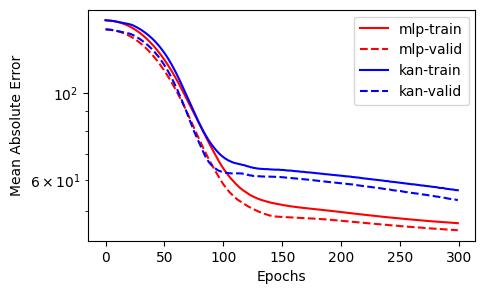

In [ ]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.semilogy(mlp_history_reg.history['mae'], label='mlp-train', ls="-", color='red')
plt.semilogy(mlp_history_reg.history['val_mae'], label='mlp-valid', ls="--", color='red')
plt.semilogy(kan_history_reg.history['mae'], label='kan-train', ls="-", color='blue')
plt.semilogy(kan_history_reg.history['val_mae'], label='kan-valid', ls="--", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()

In [ ]:
from prettytable import PrettyTable

columns = ["Neural Network Type", "Model", "Model Performance", "Time"]

myTable = PrettyTable()

# Add Columns
myTable.add_column(columns[0], ["MLP", "  ", "  ", "KAN", "  ", "  "])
myTable.add_column(columns[1], ["Classificaton (Fashion MNIST)", "Classificaton (Iris) ", "Regression (Diabetes)",
                                "Classificaton (Fashion MNIST)", "Classificaton (Iris)", "Regression (Diabetes)"])

myTable.add_column(columns[2], [f"{round(mlp_history_fm.history['val_accuracy'][-1],2)*100}%",
                                f"{round(history_mlp_iris.history['val_accuracy'][-1],2)*100}%",
                                f"{round(mlp_history_reg.history['val_mae'][-1],2)}",
                                f"{round(kan_history_fm.history['val_accuracy'][-1],2)*100}%",
                                f"{round(kan_history_iris.history['val_accuracy'][-1],2)*100}%",
                                f"{round(kan_history_reg.history['val_mae'][-1],2)}"])
myTable.add_column(columns[3], [f"{running_secs_mlp_fm}s", f"{running_secs_mlp_i}s", f"{running_secs_mlp_reg}s",
                                f"{running_secs_kan_fm}s", f"{running_secs_kan_i}s", f"{running_secs_kan_reg}s"])

print(myTable)


+---------------------+-------------------------------+-------------------+-----------------+
| Neural Network Type |             Model             | Model Performance |       Time      |
+---------------------+-------------------------------+-------------------+-----------------+
|         MLP         | Classificaton (Fashion MNIST) |       85.0%       | 0:00:36.610882s |
|                     |     Classificaton (Iris)      |       97.0%       | 0:00:11.137912s |
|                     |     Regression (Diabetes)     |       44.51       | 0:00:18.826366s |
|         KAN         | Classificaton (Fashion MNIST) |       84.0%       | 0:00:00.000085s |
|                     |      Classificaton (Iris)     |       50.0%       | 0:00:05.604978s |
|                     |     Regression (Diabetes)     |       53.14       | 0:00:43.053175s |
+---------------------+-------------------------------+-------------------+-----------------+


# Conclusion

From the above experimentations we can conclude a few things:
1. For a large dataset (Fashion MNIST): while the KAN model takes more time, it is showing comparable results in performance metrics.
2. For a smaller dataset (Iris dataset): the KANs are not perform well even though it takes lesser time. This could mean one of the two things:

  * Either the model performance can vary based on the dataset
  * The KANs cannot properly incorporate the details involved in information based classification.

Either way, KANs are not a good choice when the dataset has less number of datapoints, (atleast in the case of iris dataset) as opposed to the claims of the paper.

3. Regressio task follows the same principle as classification for larger dataset.

The whole notebook can be found in this [link](https://github.com/prayashkpan/DSL501-ML-Work).